In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [20, 20]

% matplotlib inline

UsageError: Line magic function `%` not found.


In [55]:
ABSOLUTE_PATH = '.'
DATA_FOLDER = ABSOLUTE_PATH + f'/../../data/'
INPUT_FOLDER = DATA_FOLDER + f'g4-tae/scenario2/automatic_evaluations/'
OUTPUT_FOLDER = DATA_FOLDER + f'g4-tae/scenario2/plots/'

STATS_FILES = [
    'g1s1',
    'g1s2', # Bug with automatic metrics
    'g2s1',
    'g2s2',
    'g4s1',  # Bug with automatic metrics
    'g4s2'  # Bug with automatic metrics
]

file = STATS_FILES[0]

### Read data

In [56]:
df = pd.read_csv(INPUT_FOLDER + f"{file}.csv", header=0)
df['conversation'] = 'file'
df = df.set_index('Turn')

In [57]:
print(f'{len(df)} turns')
df.head()

81 turns


,Overall Human Rating,Interesting,Engaging,Specific,Relevant,Correct,Semantically Appropriate,Understandable,Fluent,Total nodes,...,Total aBox axioms,Total tBox axioms,Total world instances,Total semantic statements,Total perspectives,Total mentions,Total interactions,Total utterances,Total sources,conversation
Turn,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2870.0,...,1762.0,1007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,file
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2870.0,...,1762.0,1007.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,file
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2870.0,...,1762.0,1007.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,file
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929.0,...,1833.0,1007.0,5.0,3.0,1.0,1.0,0.0,1.0,2.0,file
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929.0,...,1833.0,1007.0,5.0,3.0,1.0,1.0,NaN,1.0,2.0,file


In [58]:
columns_to_drop = ['Total object properties', 'Total data properties', 'Total subclass properties',
    'Attribute richness', 'Inheritance richness', 'Relationship richness', 'Total general concept inclusions',
    'Object properties ratio', 'Datatype properties ratio']
columns_to_drop = [c for c in columns_to_drop if c in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

### Correlate graph metrics with automatic and human evaluations

Append all conversations

/Users/selbaez/anaconda3/envs/evaluating-coversations-as-ekg/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


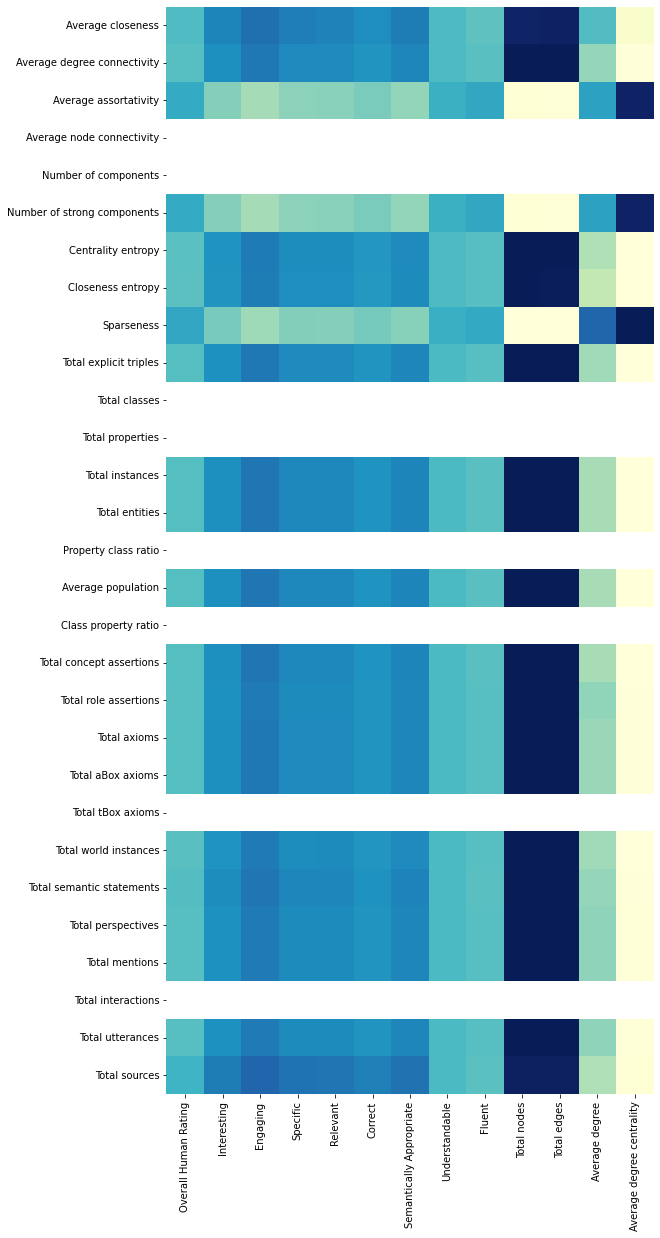

In [59]:
corr_df = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr_df, dtype=np.bool))
# zoom into the rectangle we want
corr_df = corr_df.loc[corr_df.columns[13:]]
corr_df = corr_df[corr_df.columns[:13]]
mask = mask[13:, :13]

# Plot
g = sns.heatmap(corr_df, mask=mask, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={"shrink": .7}, cbar=False,
                square=True)
g.figure.savefig(OUTPUT_FOLDER + f"Correlation heatmap.png", dpi=300)

In [60]:
df.columns

Index(['Overall Human Rating', 'Interesting', 'Engaging', 'Specific',
       'Relevant', 'Correct', 'Semantically Appropriate', 'Understandable',
       'Fluent', 'Total nodes', 'Total edges', 'Average degree',
       'Average degree centrality', 'Average closeness',
       'Average degree connectivity', 'Average assortativity',
       'Average node connectivity', 'Number of components',
       'Number of strong components', 'Centrality entropy',
       'Closeness entropy', 'Sparseness', 'Total explicit triples',
       'Total classes', 'Total properties', 'Total instances',
       'Total entities', 'Property class ratio', 'Average population',
       'Class property ratio', 'Total concept assertions',
       'Total role assertions', 'Total axioms', 'Total aBox axioms',
       'Total tBox axioms', 'Total world instances',
       'Total semantic statements', 'Total perspectives', 'Total mentions',
       'Total interactions', 'Total utterances', 'Total sources',
       'conversation'],


### Plots comparing metrics

In [61]:
# # Separate information so it can be comparable
# df_conflicts = df[['cardinality conflicts', 'negation conflicts']]
# df_gaps = df[['subject gaps', 'object gaps']]
# df_novelty = df[['statement novelty']]
# df_novelties = df[['subject novelty', 'object novelty']]
# df_overlaps = df[['overlaps subject-predicate', 'overlaps on predicate-object']]
# df_trust = df['trust']

df_automatic = ('Automatic metrics',
                df[['System llh', 'MLM llh', 'USR DLcontext', 'USR DLfact']])
df_human = ('Human metrics',
            df[['Overall Human Rating',
                'Interesting', 'Engaging', 'Specific', 'Relevant', 'Correct', 'Semantically Appropriate',
                'Understandable', 'Fluent']])

df_graph = ('Graph metrics',
            df[['Average closeness', 'Average degree connectivity', 'Average assortativity',
                'Average node connectivity', 'Number of components',
                'Number of strong components', 'Centrality entropy', 'Closeness entropy']])
df_graph_size = ('Graph size',
                 df[['Total nodes', 'Total edges']])
df_degree = ('Graph degree',
             df[['Average degree']])
df_degree_centr = ('Graph degree',
                   df[['Average degree centrality']])
df_sparse = ('Graph sparseness',
             df[['Sparseness']])

df_onto = ('RDF metrics',
           df[['Property class ratio', 'Average population', 'Class property ratio', 'Total concept assertions',
               'Total role assertions', 'Total axioms', 'Total aBox axioms', 'Total tBox axioms']])
df_onto_total = ('RDF graph size', df['Total explicit triples'])
df_onto_size = ('Ontology size', df[['Total classes', 'Total properties', 'Total instances', 'Total entities']])

df_brain = ('Brain metrics',
            df[['Total world instances',
                'Total semantic statements', 'Total perspectives', 'Total mentions',
                'Total interactions', 'Total utterances', 'Total sources']])




KeyError: "None of [Index(['System llh', 'MLM llh', 'USR DLcontext', 'USR DLfact'], dtype='object')] are in the [columns]"

In [45]:

dfs = [
    df_automatic,
    df_human,
    df_graph,
    df_graph_size,
    df_degree,
    df_degree_centr,
    df_sparse,
    df_onto,
    df_onto_total,
    df_onto_size,
    df_brain
]

In [46]:
def plot_progression(df_to_plot, name):
    df_to_plot = df_to_plot.reset_index().melt('Turn', var_name='cols', value_name='vals')
    g = sns.catplot(x="Turn", y="vals", hue='cols', data=df_to_plot, kind='point')

    ax = plt.gca()
    plt.xticks(ax.get_xticks()[::5], rotation="045")

    g.figure.savefig(OUTPUT_FOLDER + f"{name}.png", dpi=300)


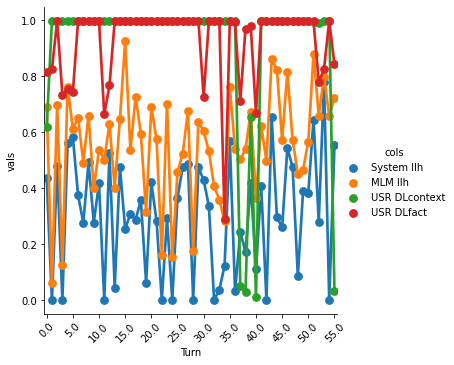

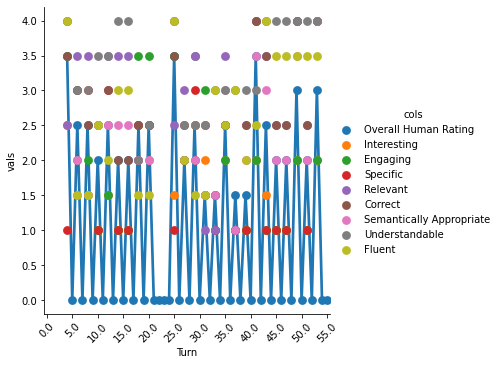

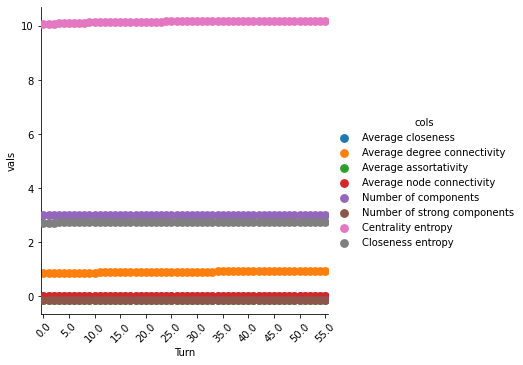

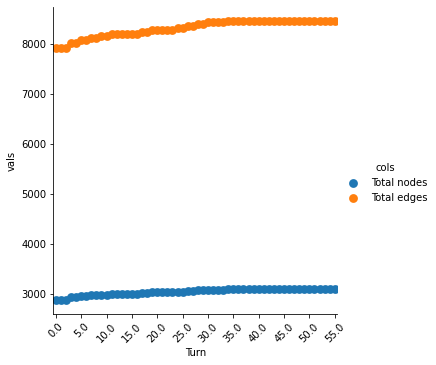

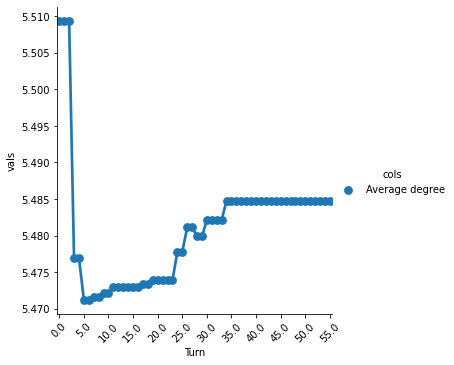

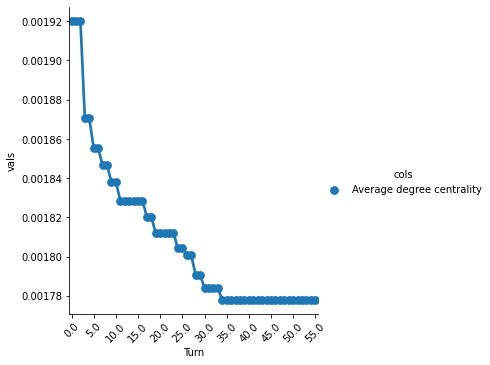

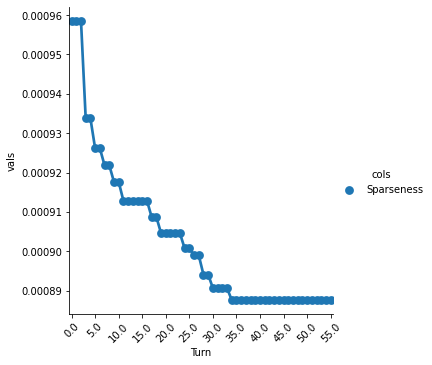

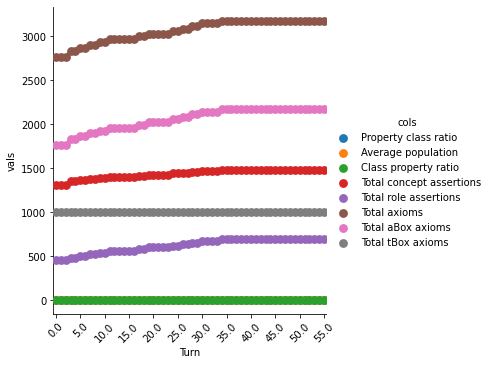

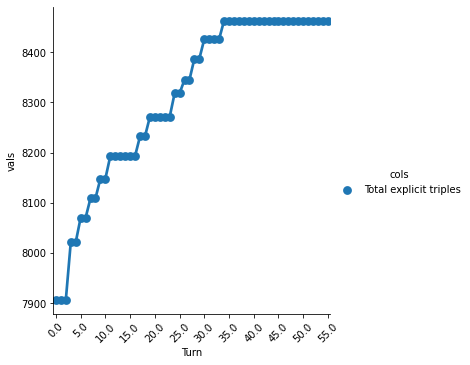

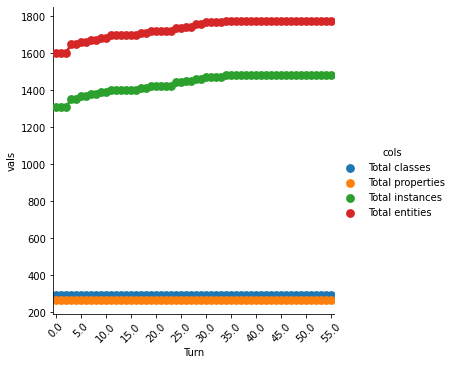

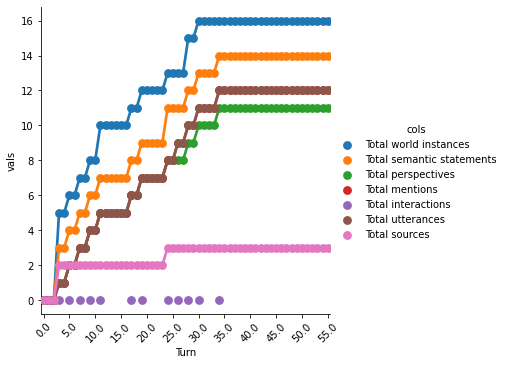

In [47]:
for (name, el) in dfs:
    plot_progression(el, name)

### Plot for one metric, different conversations